**Integrantes**
- Joan Sepastian Pedraza Nova
- Juan Diego García Hernández

Librerias

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt


Carga Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tratamiento de imagenes

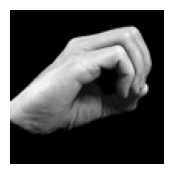

Seña 0:
  Media promedio de la matriz: 49.711877199999996
  Desviación estándar promedio de la matriz: 38.628614269815046


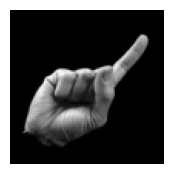

Seña 1:
  Media promedio de la matriz: 33.1562366
  Desviación estándar promedio de la matriz: 32.10217557828659


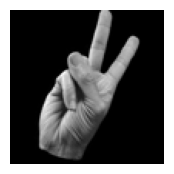

Seña 2:
  Media promedio de la matriz: 34.5726748
  Desviación estándar promedio de la matriz: 34.85843802990013


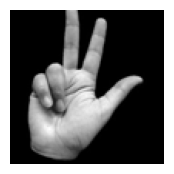

Seña 3:
  Media promedio de la matriz: 42.9775894
  Desviación estándar promedio de la matriz: 38.195106966871315


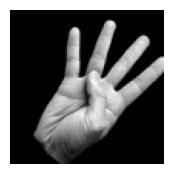

Seña 4:
  Media promedio de la matriz: 43.04546
  Desviación estándar promedio de la matriz: 37.55644240815017


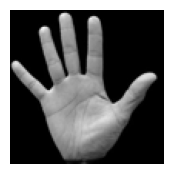

Seña 5:
  Media promedio de la matriz: 51.62332979999999
  Desviación estándar promedio de la matriz: 38.44528688512371


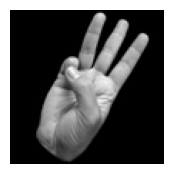

Seña 6:
  Media promedio de la matriz: 39.1129112
  Desviación estándar promedio de la matriz: 36.03981872653458


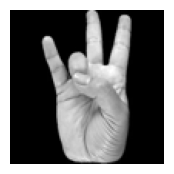

Seña 7:
  Media promedio de la matriz: 39.542888
  Desviación estándar promedio de la matriz: 36.677794643106594


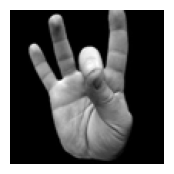

Seña 8:
  Media promedio de la matriz: 43.485614
  Desviación estándar promedio de la matriz: 36.96306000090641


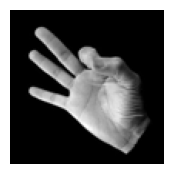

Seña 9:
  Media promedio de la matriz: 42.9941864
  Desviación estándar promedio de la matriz: 33.72127932461801
Media promedio de todas las imágenes: 42.02227674
Desviación estándar promedio de todas las imágenes: 40.34891108330334


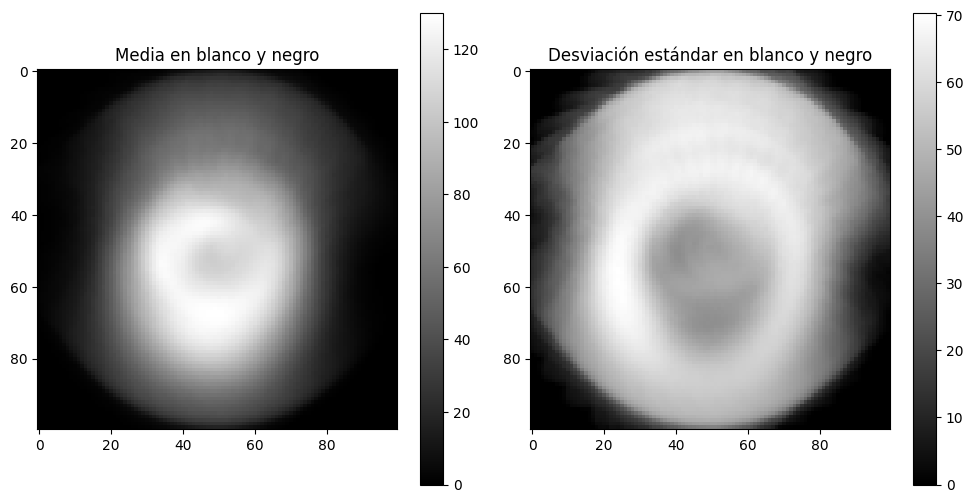

In [ ]:
dataset_dir = '/content/drive/MyDrive/AmericanSignLanguageDigitsDataset'

image_matrices = {str(i): [] for i in range(10)}

new_size = (100, 100)

X=[]
y=[]

for i in range(10):
    folder_name = f"{i}/Input Images - Sign {i}"
    folder_path = os.path.join(dataset_dir, folder_name)

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpeg"):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert('L')

            img_resized = img.resize(new_size)

            data_img = np.array(img_resized).flatten()
            X.append(data_img)
            y.append(i)

            img_array = np.array(img_resized)

            image_matrices[str(i)].append(img_array)

for key in image_matrices:
    image_matrices[key] = np.array(image_matrices[key])

mean_std_results = {}

for key, matrices in image_matrices.items():

    mean_image = np.mean(matrices, axis=0)
    std_image = np.std(matrices, axis=0)

    mean_std_results[key] = {
        'mean': mean_image,
        'std': std_image
    }

all_images = np.concatenate(list(image_matrices.values()), axis=0)
overall_mean = np.mean(all_images, axis=0)
overall_std = np.std(all_images, axis=0)

for key in mean_std_results:
    plt.figure(figsize=(2, 2))
    plt.imshow(image_matrices[key][0], cmap='gray')
    plt.axis('off')
    plt.show()

    print(f"Seña {key}:")
    print(f"  Media promedio de la matriz: {np.mean(mean_std_results[key]['mean'])}")
    print(f"  Desviación estándar promedio de la matriz: {np.mean(mean_std_results[key]['std'])}")

print(f"Media promedio de todas las imágenes: {np.mean(overall_mean)}")
print(f"Desviación estándar promedio de todas las imágenes: {np.mean(overall_std)}")

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(overall_mean, cmap='gray')
plt.title('Media en blanco y negro')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(overall_std, cmap='gray')
plt.title('Desviación estándar en blanco y negro')
plt.colorbar()

plt.tight_layout()
plt.show()


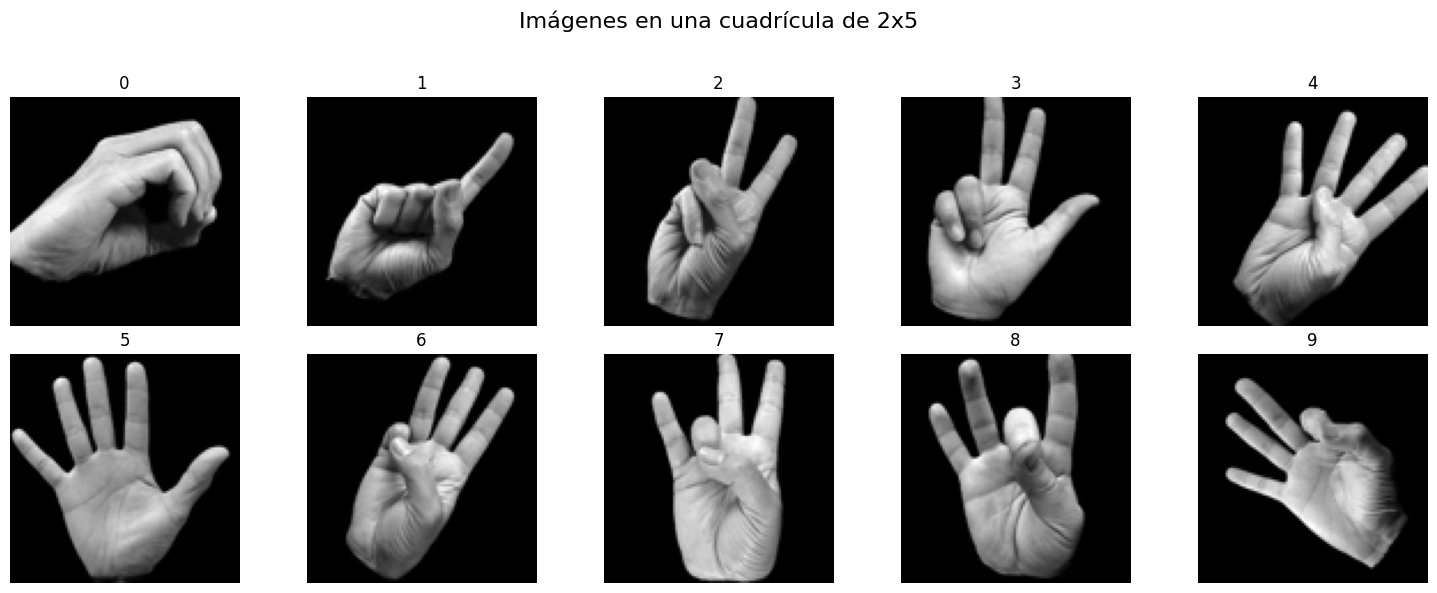

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar 10 imágenes para mostrar (una de cada clase)
selected_images = []
for key in image_matrices:
    if len(image_matrices[key]) > 0:
        selected_images.append(image_matrices[key][0])

# Crear una figura para mostrar las imágenes en una cuadrícula de 2x5
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Imágenes en una cuadrícula de 2x5', fontsize=16)

# Mostrar cada imagen en la cuadrícula
for i, ax in enumerate(axes.flat):
    if i < len(selected_images):
        ax.imshow(selected_images[i], cmap='gray')
        ax.set_title(f'{i}')
    ax.axis('off')  # Ocultar los ejes

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el espaciado
plt.show()


# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = RandomForestClassifier()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print("Tasa de aciertos: ")
print(acc)


Tasa de aciertos: 
0.973


In [ ]:
X_train.shape

(4000, 10000)

In [ ]:
X_test.shape

(1000, 10000)

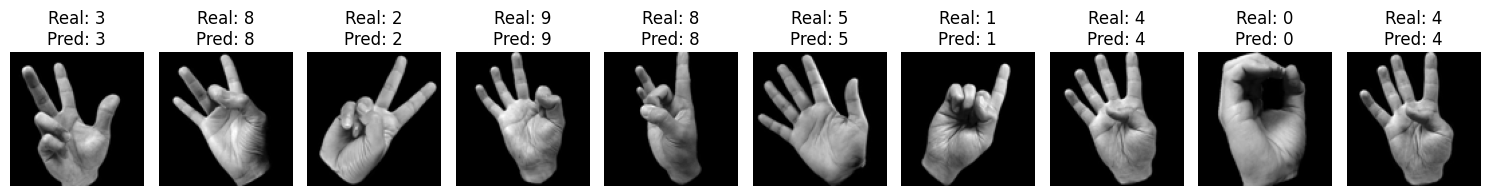

In [ ]:
import matplotlib.pyplot as plt

num_images_to_display = 10
indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    img = X_test[idx].reshape(new_size)
    true_label = y_test[idx]
    predicted_label = y_pred[idx]

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Real: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()

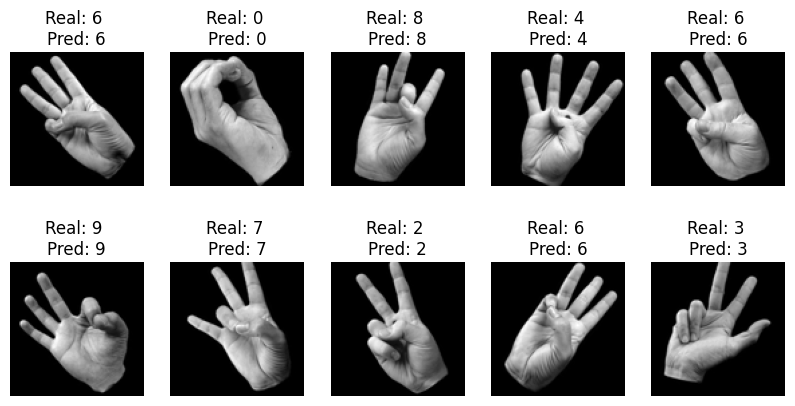

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for i in range(2):
  for j in range(5):
    plt.subplot(2,5,(i*5)+j+1)
    plt.title(f"Real: {y_test[(i*5)+j]} \nPred: {y_pred[(i*5)+j]}")
    plt.imshow(np.array(X_test[(i*5)+j].reshape(new_size)), cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
#@title Fitting n_stimators
def show_curve(X_train, X_test, y_train, y_test):
    #means, stds = [], []
    scores = []
    nestimators_range = range(10,101,10)
    for nestimators in nestimators_range:
        #print (nfolds,)
        #s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        est = RandomForestClassifier(n_estimators=nestimators)
        est.fit(X_train, y_train)
        pred = est.predict(X_test)
        scores.append(accuracy_score(pred, y_test))
        #means.append(np.mean(s))
        #stds.append(np.std(s))

    #means = np.r_[means]
    scores = np.r_[scores]
    #stds  = np.r_[stds]

    plt.plot(nestimators_range, scores, label="scores", color="black")
    #plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("Número de estimadores")
    plt.ylabel("Accuracy")
    plt.legend()

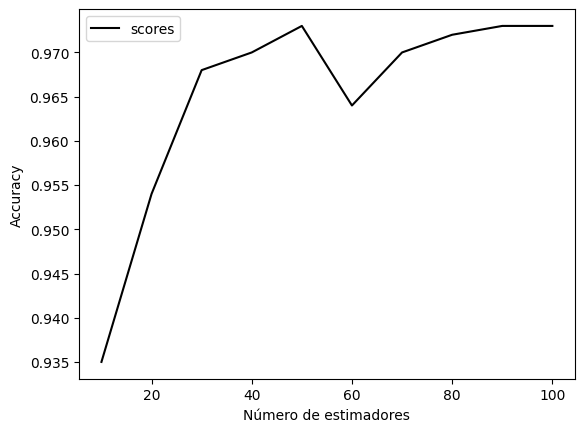

In [ ]:
show_curve(X_train, X_test, y_train, y_test)

In [ ]:
#@title Fitting Criterion
def show_criterion_curve(X_train, X_test, y_train, y_test):
    scores = []
    criteria = ["gini", "entropy", "log_loss"]
    for criterion in criteria:
        clf = RandomForestClassifier(criterion=criterion)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        scores.append(accuracy_score(pred, y_test))

    scores = np.r_[scores]

    plt.bar(criteria, scores, color=["blue", "orange", "yellow"])
    plt.xlabel("Criterio de División")
    plt.ylabel("Accuracy")
    plt.title("Puntajes de Acierto - Criterion")
    plt.ylim(0, 1)
    plt.show()

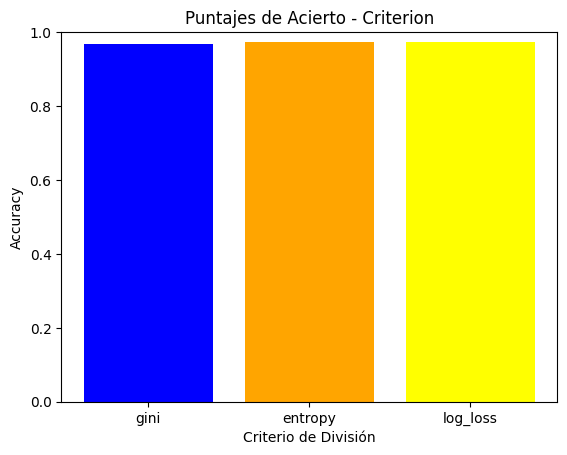

In [ ]:
show_criterion_curve(X_train, X_test, y_train, y_test)

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

est = DecisionTreeClassifier()
est.fit(X_train, y_train)

y_pred = est.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print("Tasa de aciertos: ")
print(acc)


Tasa de aciertos: 
0.815


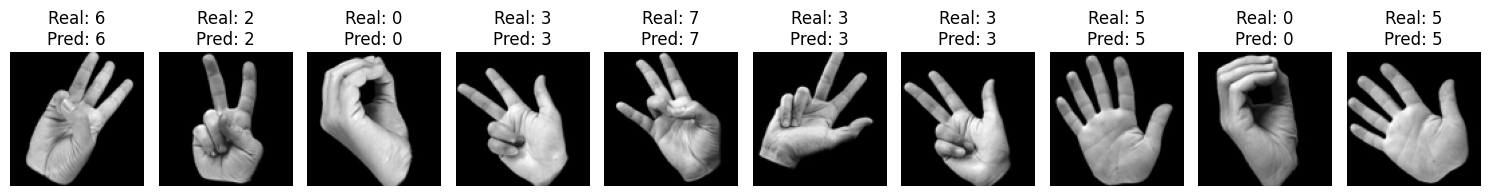

In [ ]:
num_images_to_display = 10
indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    img = X_test[idx].reshape(new_size)
    true_label = y_test[idx]
    predicted_label = y_pred[idx]

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Real: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()

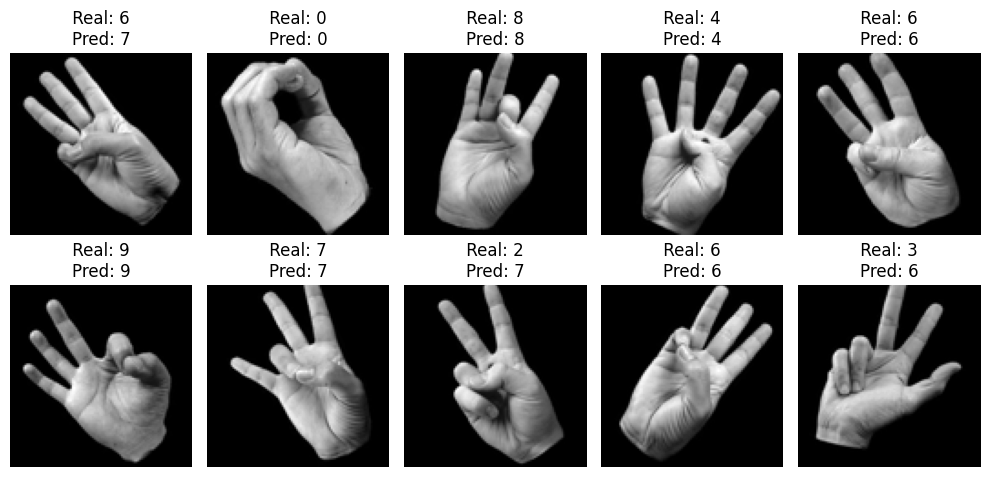

In [ ]:
# Visualización adicional en cuadrícula
plt.figure(figsize=(10, 5))
for i in range(2):
    for j in range(5):
        idx = (i * 5) + j
        img = X_test[idx].reshape(new_size)
        plt.subplot(2, 5, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f" Real: {y_test[idx]} \nPred: {y_pred[idx]}")

plt.tight_layout()
plt.show()

In [ ]:
#@title Fitting max depth
def show_curve(X_train, X_test, y_train, y_test):
    scores = []
    max_depth_range = range(1, 21)
    for max_depth in max_depth_range:
        est = DecisionTreeClassifier(max_depth=max_depth)
        est.fit(X_train, y_train)
        pred = est.predict(X_test)
        scores.append(accuracy_score(pred, y_test))

    scores = np.r_[scores]

    plt.plot(max_depth_range, scores, label="Accuracy", color="black")
    plt.xlabel("Máxima profundidad (max_depth)")
    plt.ylabel("Accuracy")
    plt.title("Curva de aprendizaje (max_depth) - DecisionTreeClassifier")
    plt.legend()
    plt.grid()
    plt.show()

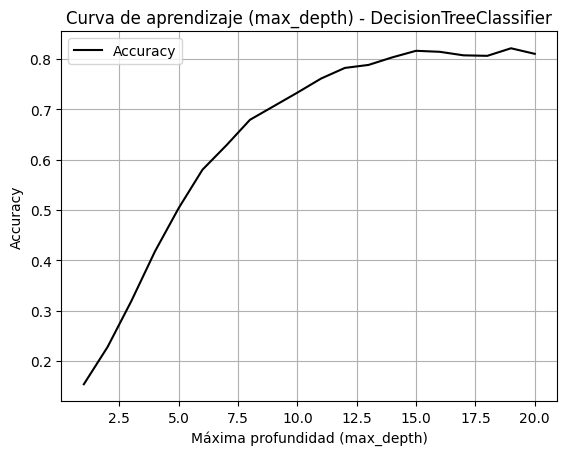

In [ ]:
show_curve(X_train, X_test, y_train, y_test)

In [ ]:
#@title Fitting Criterion
def show_criterion_curve(X_train, X_test, y_train, y_test):
    scores = []
    criteria = ["gini", "entropy", "log_loss"]
    for criterion in criteria:
        clf = DecisionTreeClassifier(criterion=criterion)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        scores.append(accuracy_score(pred, y_test))

    scores = np.r_[scores]

    plt.bar(criteria, scores, color=["blue", "orange", "yellow"])
    plt.xlabel("Criterio de División")
    plt.ylabel("Accuracy")
    plt.title("Puntajes de Acierto - Criterion (DecisionTreeClassifier)")
    plt.ylim(0, 1)  # Asegura que el eje y esté en [0, 1] para porcentajes
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

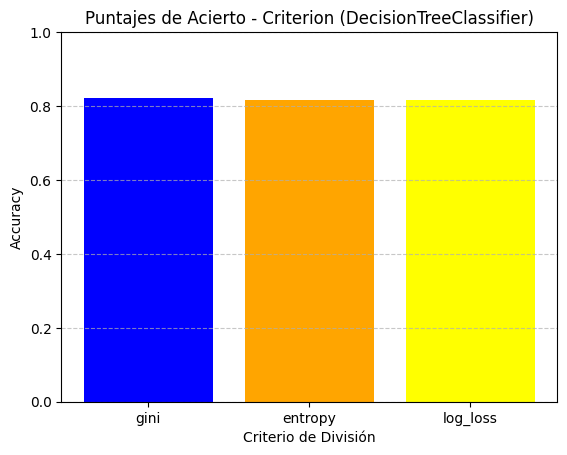

In [ ]:
show_criterion_curve(X_train, X_test, y_train, y_test)

# Maquina de Soporte Vectorial

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print("Tasa de aciertos: ")
print(acc)

Tasa de aciertos: 
0.987


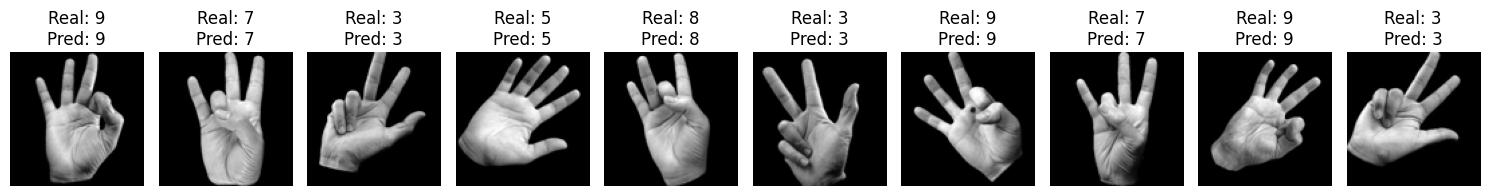

In [ ]:
num_images_to_display = 10
indices = np.random.choice(len(X_test), num_images_to_display, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    img = X_test[idx].reshape(new_size)
    true_label = y_test[idx]
    predicted_label = y_pred[idx]

    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Real: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()

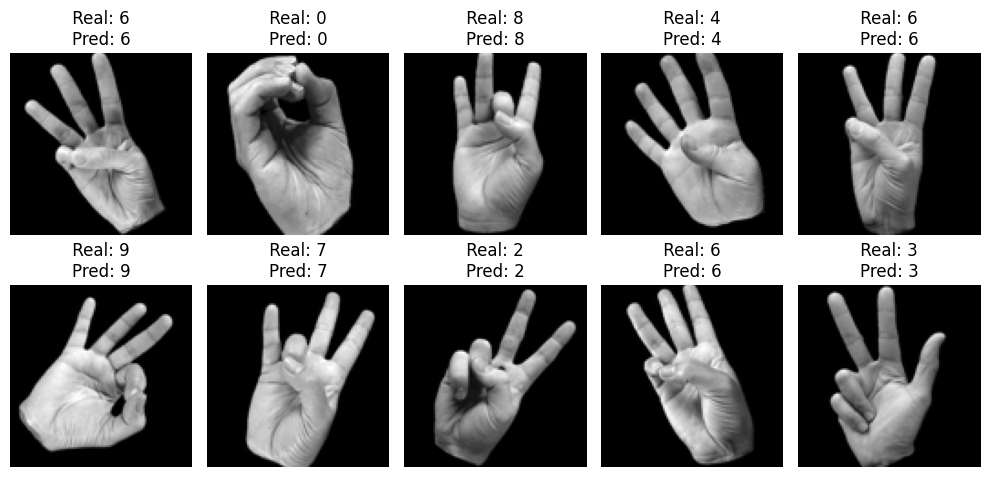

In [ ]:
# Visualización adicional en cuadrícula
plt.figure(figsize=(10, 5))
for i in range(2):
    for j in range(5):
        idx = (i * 5) + j
        img = X_test[idx].reshape(new_size)
        plt.subplot(2, 5, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f" Real: {y_test[idx]} \nPred: {y_pred[idx]}")

plt.tight_layout()
plt.show()

In [ ]:
#@title Fitting Kernel
def show_curve(X_train, X_test, y_train, y_test):
    scores = []
    kernels = ["rbf", "poly", "linear"]
    for kernel_i in kernels:
        svc = SVC(kernel=kernel_i)
        svc.fit(X_train, y_train)
        pred = svc.predict(X_test)
        scores.append(accuracy_score(pred, y_test))

    scores = np.r_[scores]

    plt.bar(kernels, scores)
    plt.title("Puntajes de Acierto - Kernel")
    plt.show()

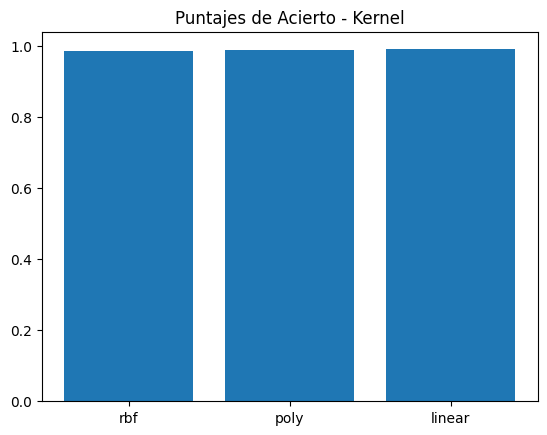

In [ ]:
show_curve(X_train, X_test, y_train, y_test)

In [ ]:
#@title Fitting gamma
def show_curve(X_train, X_test, y_train, y_test):
    scores = []
    gamma_range = [0.001, 0.01, 0.1, 1, 10, 100]
    for gamma in gamma_range:
        svc = SVC(gamma=gamma)
        svc.fit(X_train, y_train)
        pred = svc.predict(X_test)
        scores.append(accuracy_score(pred, y_test))

    scores = np.r_[scores]

    print(scores)

    plt.plot(gamma_range, scores, label="Accuracy", color="black", marker='o')
    plt.xscale('log')
    plt.xlabel("Valor de gamma (log-scale)")
    plt.ylabel("Accuracy")
    plt.title("Curva de aprendizaje (gamma) - SVC")
    plt.legend()
    plt.grid()
    plt.show()

[0.224 0.224 0.224 0.224 0.224 0.224]


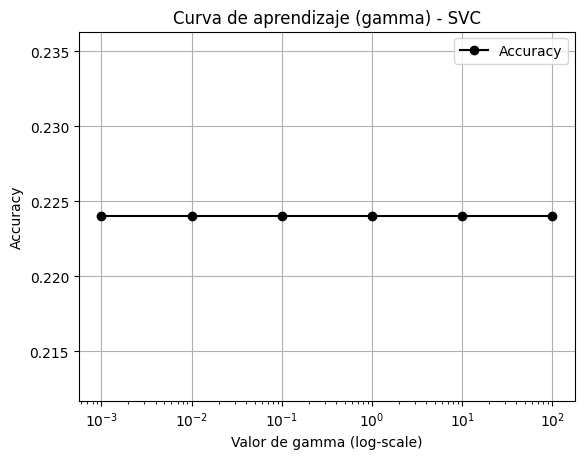

In [ ]:
show_curve(X_train, X_test, y_train, y_test)

### Gamma que calcula sklearn

In [ ]:
gamma = 1/(10000*X.var())
print(gamma)

2.6844130199959283e-08


In [ ]:
#@title Intentemos con valores más cercanos al gamma que calcula por defecto SKlearn
def show_curve(X_train, X_test, y_train, y_test):
    scores = []
    gamma_range = [2e-10, 2e-9, 2e-8, 2e-7, 2e-6, 2e-5]
    for gamma in gamma_range:
        svc = SVC(kernel='rbf', gamma=gamma)
        svc.fit(X_train, y_train)
        pred = svc.predict(X_test)
        scores.append(accuracy_score(pred, y_test))

    scores = np.r_[scores]

    print(scores)

    plt.plot(gamma_range, scores, label="Accuracy", color="black", marker='o')
    plt.xscale('log')
    plt.xlabel("Valor de gamma (log-scale)")
    plt.ylabel("Accuracy")
    plt.title("Curva de aprendizaje (gamma) - SVC")
    plt.legend()
    plt.grid()
    plt.show()

[0.322 0.877 0.983 0.983 0.546 0.28 ]


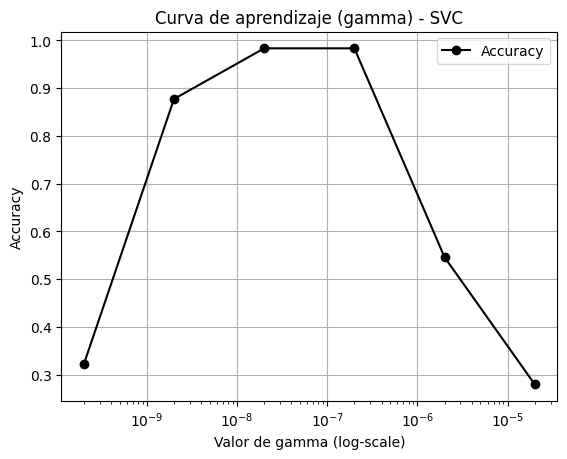

In [ ]:
show_curve(X_train, X_test, y_train, y_test)

# B) Cross Validation

In [ ]:
#@title **code** learning curve
def show_curve(est):

    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold

    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

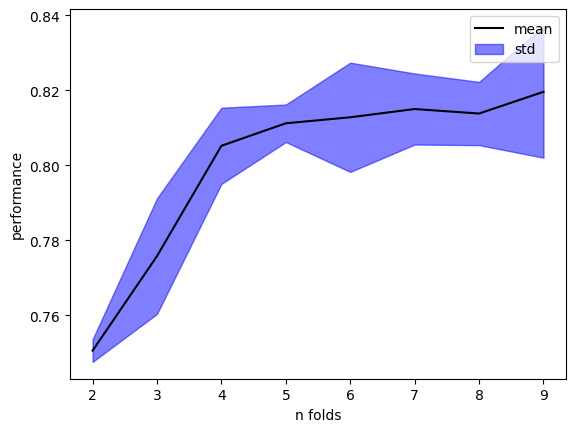

In [ ]:
#@title **code** using DTC

from sklearn.model_selection import cross_val_score

show_curve(DecisionTreeClassifier())

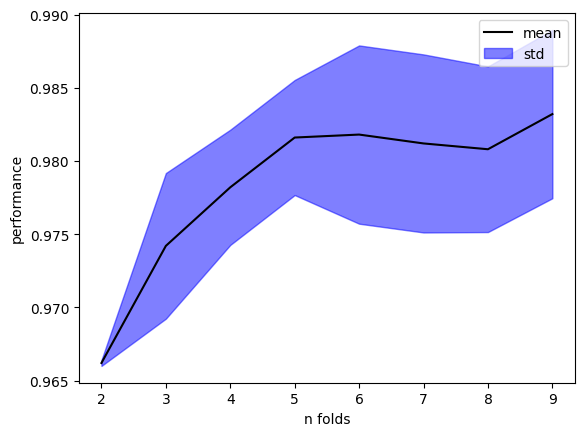

In [ ]:
#@title **code** using RTC

from sklearn.model_selection import cross_val_score

show_curve(RandomForestClassifier())

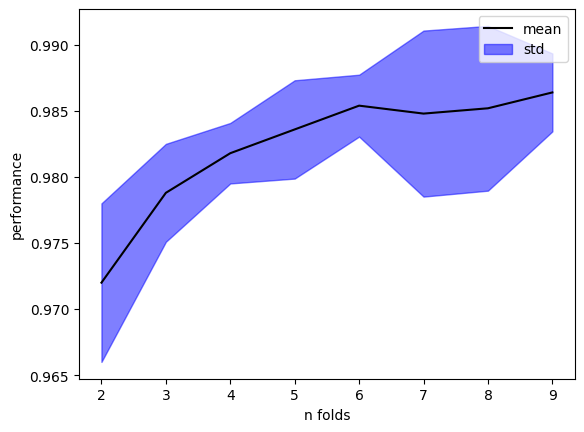

In [ ]:
#@title **code** using SVC

from sklearn.model_selection import cross_val_score

show_curve(SVC())

# Perceptron Multicapa


In [ ]:
#@title Preparación de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

X_train = np.array(X_train).astype('float32') / 255.0
X_test = np.array(X_test).astype('float32') / 255.0

y_train = np.array(y_train)
y_test = np.array(y_test)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Número de etiquetas en y_train:", len(y_train))
print("Número de etiquetas en y_test:", len(y_test))

Forma de X_train: (4000, 10000)
Forma de X_test: (1000, 10000)
Número de etiquetas en y_train: 4000
Número de etiquetas en y_test: 1000


In [ ]:
#@title Perceptron con 3 capas ocultas
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       5,120,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,286,026 (20.16 MB)

 Trainable params: 5,286,026 (20.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#@title Entrenamiento del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.4725 - loss: 1.5633
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9500 - loss: 0.1707
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.9773 - loss: 0.0776
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.9704 - loss: 0.0966
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9915 - loss: 0.0290
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.9979 - loss: 0.0088
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9965 - loss: 0.0136
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.9882 - loss: 0.0410
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9531 - loss: 0.1575
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.9813 - loss: 0.0536


In [ ]:
#@title Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nPrecisión en el conjunto de prueba:", test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9851 - loss: 0.0466

Precisión en el conjunto de prueba: 0.9869999885559082


In [ ]:
#@title Puntaje de precisión
from sklearn.metrics import accuracy_score
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión calculada con accuracy_score:", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

Precisión calculada con accuracy_score: 0.987


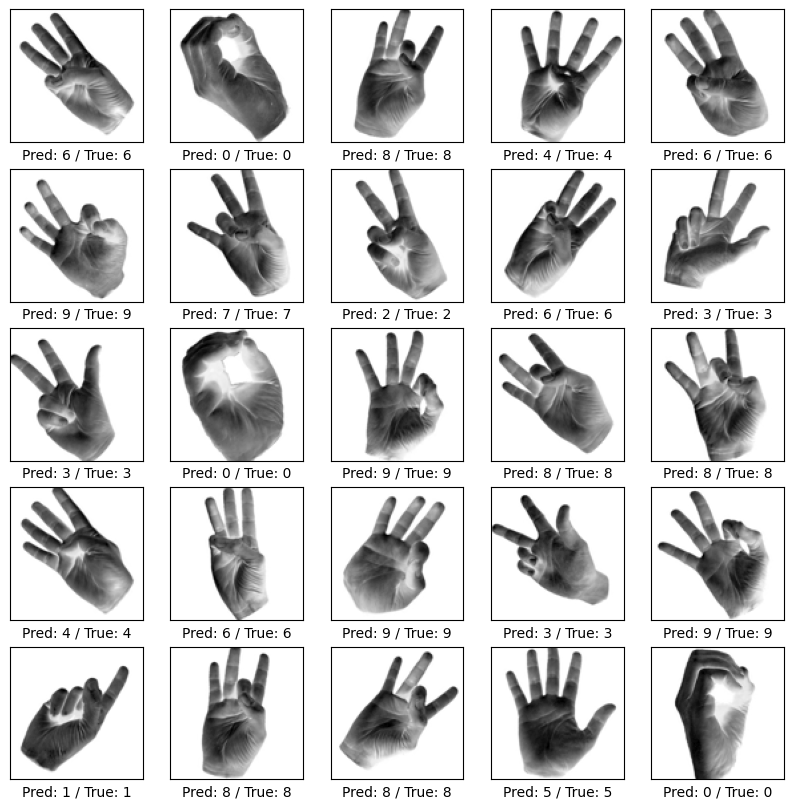

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(100, 100), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"Pred: {y_pred[i]} / True: {y_test[i]}")
plt.show()

In [ ]:
#@title Perceptron con 6 capas ocultas
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │      10,241,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,940,714 (41.74 MB)

 Trainable params: 10,940,714 (41.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#@title Entrenamiento del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 326ms/step - accuracy: 0.3741 - loss: 1.7323
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - accuracy: 0.9014 - loss: 0.3215
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 324ms/step - accuracy: 0.9561 - loss: 0.1393
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 292ms/step - accuracy: 0.9554 - loss: 0.1497
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 210ms/step - accuracy: 0.9778 - loss: 0.0647
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 213ms/step - accuracy: 0.9509 - loss: 0.1607
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - accuracy: 0.9911 - loss: 0.0277
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 212ms/step - accuracy: 0.9814 - loss: 0.0578
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.9723 - loss: 0.0880
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 225ms/step - accuracy: 0.9841 - loss: 0.0561


In [ ]:
#@title Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nPrecisión en el conjunto de prueba:", test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9608 - loss: 0.1149

Precisión en el conjunto de prueba: 0.9679999947547913


In [ ]:
#@title Puntaje de precisión
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión calculada con accuracy_score:", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step

Precisión calculada con accuracy_score: 0.968


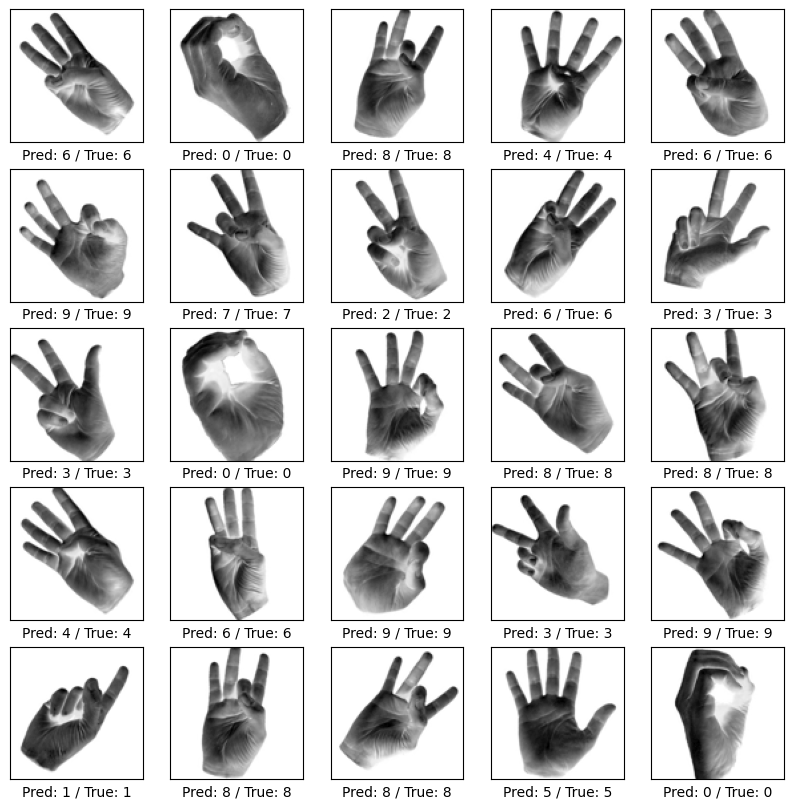

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(100, 100), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"Pred: {y_pred[i]} / True: {y_test[i]}")
plt.show()

In [ ]:
#@title Perceptron con 10 capas ocultas
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1024)                │      10,241,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,942,682 (41.74 MB)

 Trainable params: 10,942,682 (41.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#@title Entrenamiento del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 30s 213ms/step - accuracy: 0.2126 - loss: 2.0388
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 0.6317 - loss: 0.9425
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.8382 - loss: 0.4429
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.9181 - loss: 0.2370
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - accuracy: 0.9575 - loss: 0.1243
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.9591 - loss: 0.1180
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.9428 - loss: 0.1896
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 220ms/step - accuracy: 0.9687 - loss: 0.1015
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 221ms/step - accuracy: 0.9775 - loss: 0.0712
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.9789 - loss: 0.0586


In [ ]:
#@title Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nPrecisión en el conjunto de prueba:", test_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9632 - loss: 0.1321

Precisión en el conjunto de prueba: 0.9610000252723694


In [ ]:
#@title Puntaje de precisión
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión calculada con accuracy_score:", accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

Precisión calculada con accuracy_score: 0.961


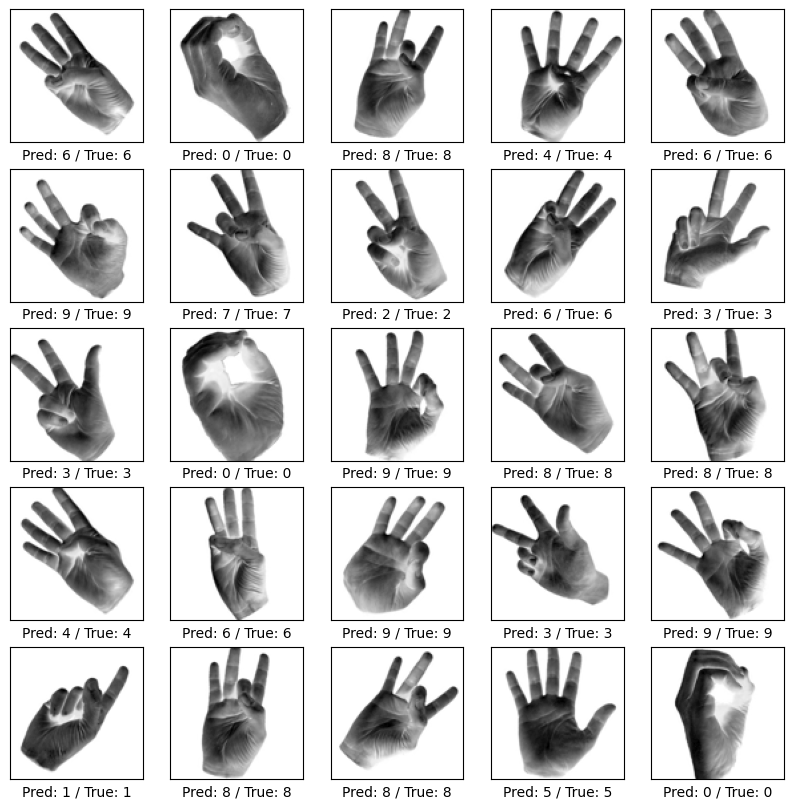

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(100, 100), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"Pred: {y_pred[i]} / True: {y_test[i]}")
plt.show()